### 주성분 분석

In [1]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [6]:
# 주성분 분석 시각화
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

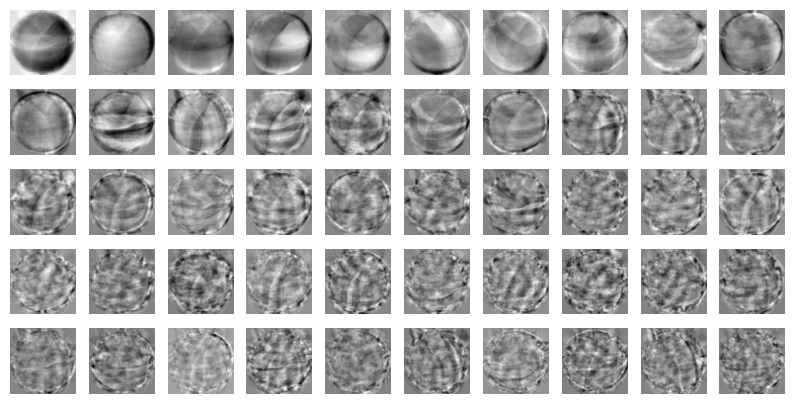

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
# 원본 데이터 줄이기
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
# 줄어든 원본데이터 다시 복구하기
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

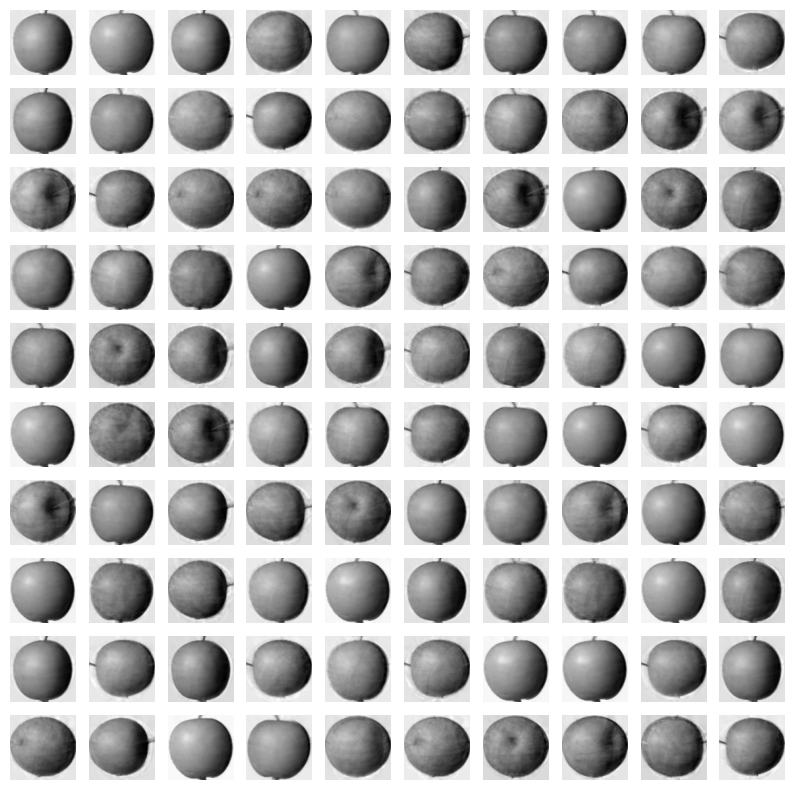

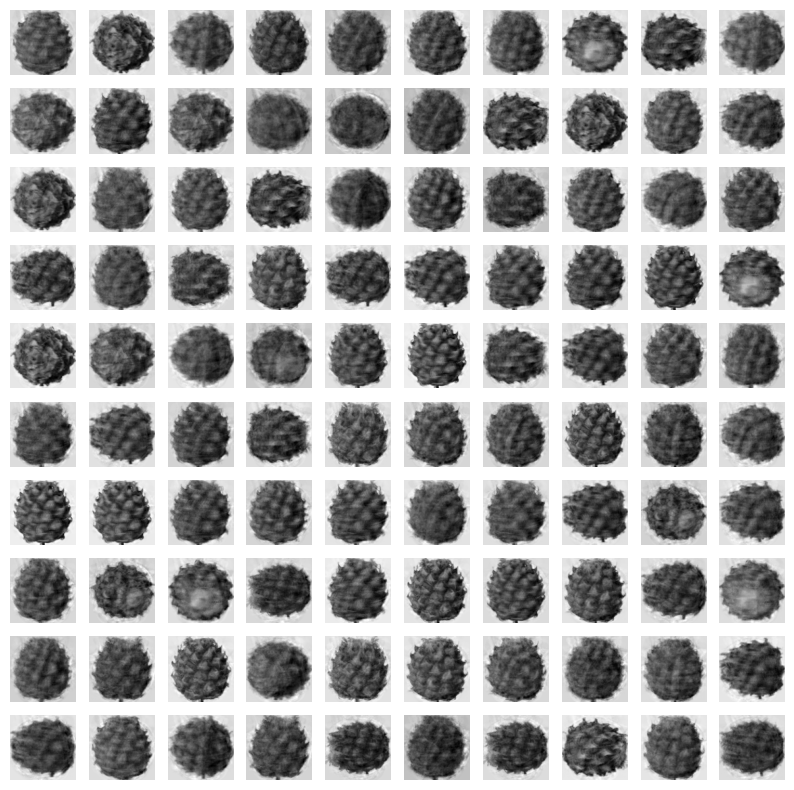

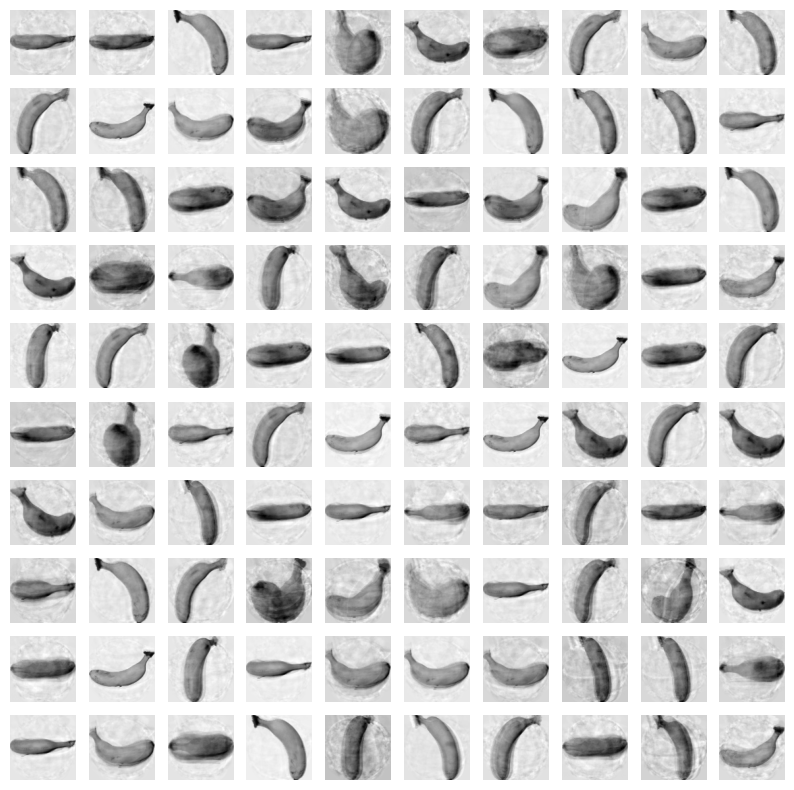

In [10]:
# 복구된 원데이터를 확인해보면 노이즈가 낀 것을 확인
# pca값을 복구하면 원데이터를 정확히 복구시키지 못함
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [11]:
# 설명된 분산
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값.
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447838, 0.00437318, 0.0040804 , 0.00389462, 0.00372443,
       0.00359289, 0.0033146 , 0.00317832, 0.00304321, 0.00303755,
       0.00288836, 0.00275747, 0.002647  , 0.00255834, 0.00252089,
       0.00247344, 0.00239339, 0.00230876, 0.0022202 , 0.00216416,
       0.00213753, 0.00196052, 0.00192861, 0.00190417, 0.00184852,
       0.00181625, 0.00173296, 0.00166982, 0.0016089 , 0.00159608])

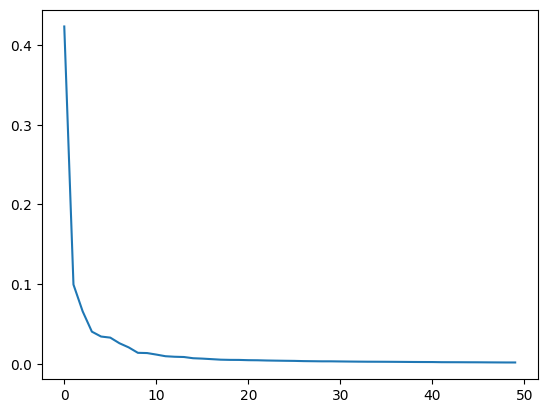

In [13]:
# 설명된 분산 시각화
plt.plot(pca.explained_variance_ratio_)
plt.show()
# np.sum(pca.explained_variance_ratio_) 을 사용하면 설명분산 합이 나옴
# 분산 설명력이 약 92% 정도 된다는 값이 나옴

In [19]:
# 로지스틱 회귀 모델을 사용하여 확인
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [17]:
from sklearn.model_selection import cross_validate

In [21]:
# 원본데이터 확인
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.26374578, 0.23115516, 0.13900352, 0.1349535 , 0.19081092]),
 'score_time': array([0.00400257, 0.00300312, 0.0030477 , 0.00202608, 0.00400591]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [23]:
# 주성분 분석 확인
scores = cross_validate(lr, fruits_pca, target)
scores
# 값은 크게 차이없지만 계속 속도가 차이남
# 데이터 양이 많다면 유용함

{'fit_time': array([0.00600171, 0.00700021, 0.00655675, 0.00599861, 0.01199245]),
 'score_time': array([0.00099921, 0.        , 0.00099516, 0.00100422, 0.        ]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [24]:
# 주성분 몇개를 사용해야 좋을지 확인하기
pca = PCA(n_components=0.5)
    # 주성분 분석의 설명분산 누적합이 0.5가 될때까지 찾기.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
pca.n_components_
# 10000개의 픽셀 중 3개의 특성을 이용하여 만든 주성분 2개가 분산의 50% 설명 가능

np.int64(2)

In [27]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [29]:
scores = cross_validate(lr, fruits_pca, target)
scores
# 나오는 붉은 창은 충분히 분석하지 않았다는 표시임. 무시ㄱㄱ

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'fit_time': array([0.02204943, 0.01596475, 0.01499987, 0.00800729, 0.01499963]),
 'score_time': array([0.00103378, 0.00099993, 0.00100017, 0.00099325, 0.00100017]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [34]:
# K-평균 알고리즘에 적용
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))

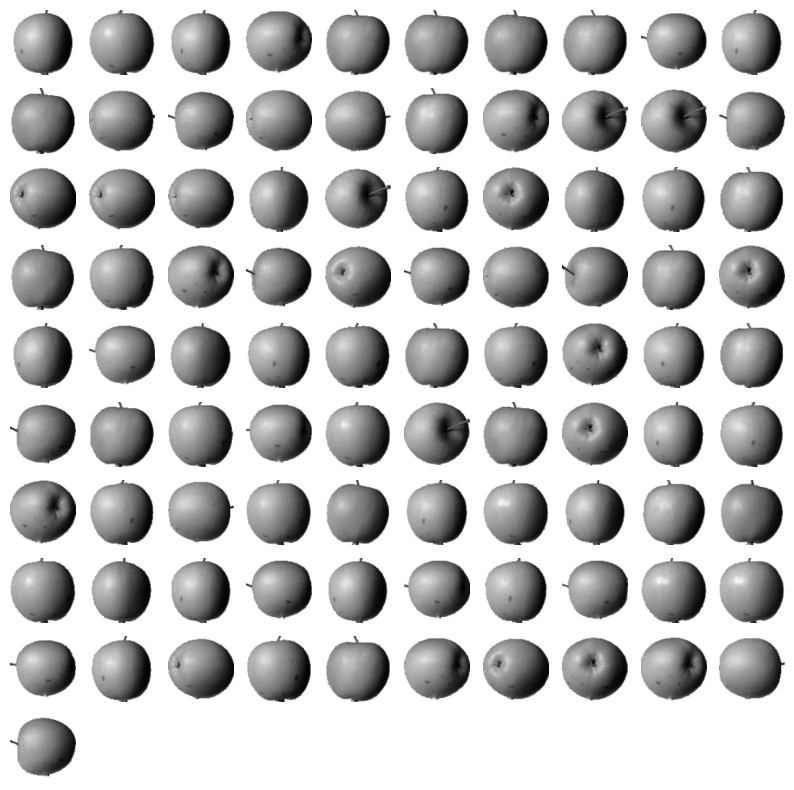

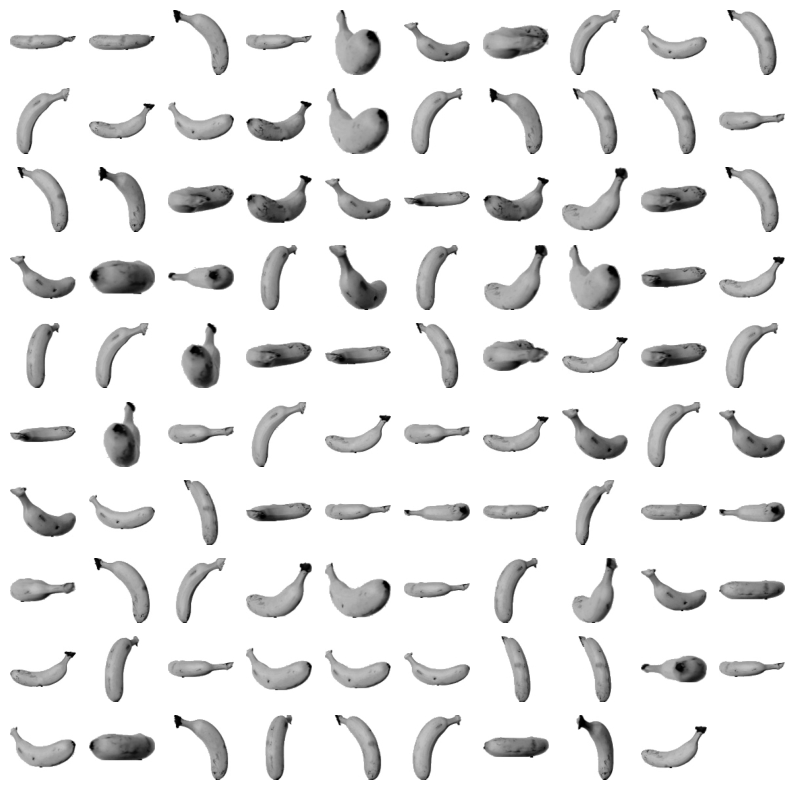

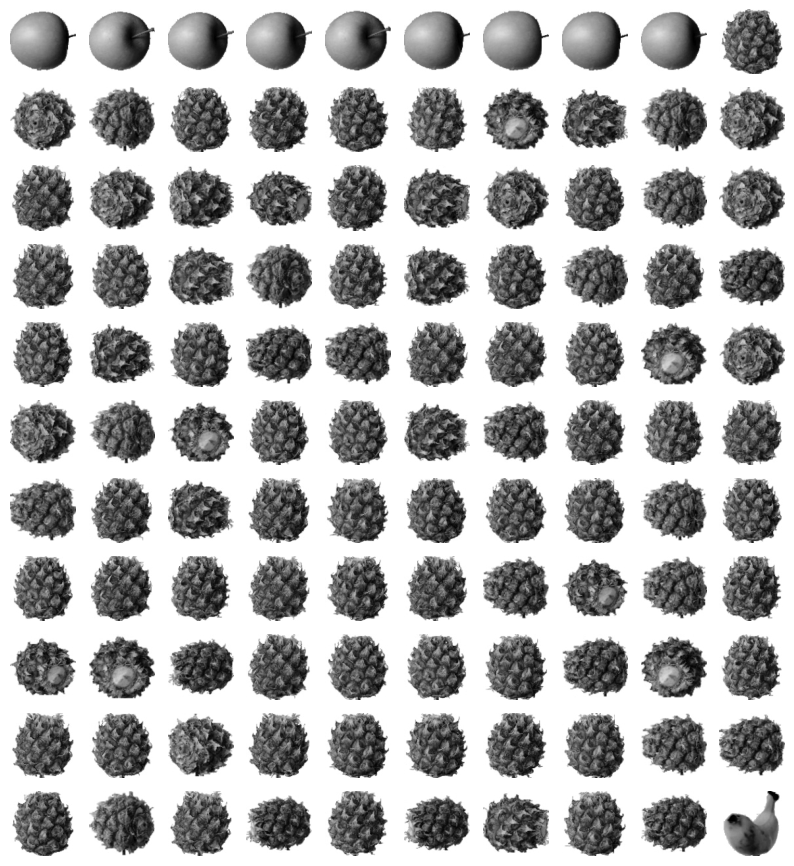

In [35]:
# 그림그리기 
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')